<a href="https://colab.research.google.com/github/VitorZe/Projeto-1_Abandono-e-Sucesso-Academico/blob/main/PUC-RIO%20MVP%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução
Tempo médio para execução do notebook: 22 min, destes, 15min são da otimização de Hiperparâmetros do modelo, ao final dessa etapa, há uma comparação entre o modelo com e sem otimização

**Descrição do problema**

   Trata-se de um banco de dados retirado da UCI Machine Learning Repository, com uma gama de informações sociodemográficas, econômicas e acadêmicas de alunos de universidae. No estudo em questão os autores usaram dados institucionais, adquiridos de várias bases de dados desarticuladas. Fizeram todo o pre-processamento e limpeza para garantir ausência de nulls e outliers. A amostra é de estudantes em cursos de ensino superior do Instituto Politécnico de Portalegre, em Portugal. Os dados foram adquiridos entre os intervalos de tempo dos semestres letivos de 2008/2009 a 2018/2019 (Martins et al., 2021). Trata-se de um banco de dados projetado para desenvolvimento de um modelo de aprendizado supervisionado, existem inputs e outputs (Variáveis Independentes e Dependentes) previamente selecionados e registrados, que servirão para a elaboração de um modelo preditivo com classificação múltipla (3 outputs)

---
**Restrições ou condições para seleção dos dados**

- A seleção do banco de dados em si foi feita por afinidade do autor, tendo em vista seu interesse pelo campo educacional.
- As restrições existentes quanto aos dados se referem ao conjunto de atributos denominados "curricular units", que por falta de compreensão do autor quanto ao sistema de unidades curriculares de portugal foi desconsiderado

**Descrição do dataset**

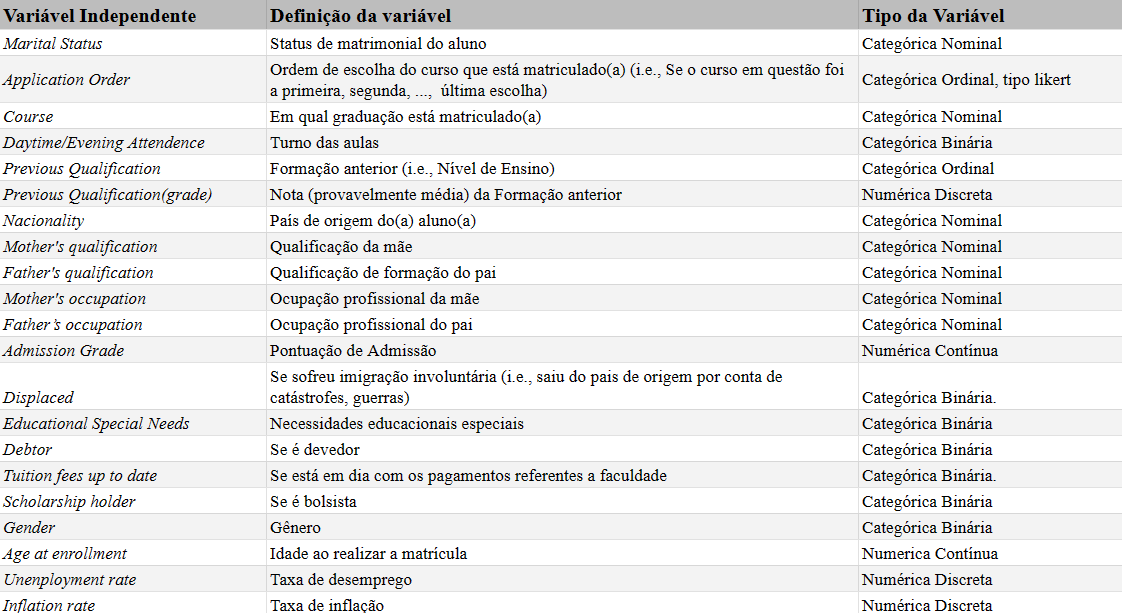

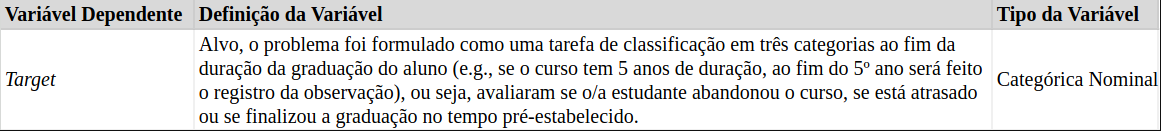

# 2.Pré-Processamento

## 2.1 Imports e instalação de bibliotecas necessárias

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Organização, processamento e Visualização dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics as st
import sklearn

# Pré processamento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder # pra variável target
from sklearn.preprocessing import MinMaxScaler #Normalização
from sklearn.preprocessing import StandardScaler #Padronização
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Seleção de Características
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos

# seleção de modelos
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Treinamento e avaliação do modelo
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.pipeline import Pipeline

## 2.2 Criação do dataset e tradução dos atributos

In [3]:
df = pd.read_csv ('https://raw.githubusercontent.com/VitorZe/Projeto-1_Abandono-e-Sucesso-Academico/main/data.csv', delimiter=';')


## 2.1 Pré-pré-processamento
*Viéses do autor na tradução do dataset:*
- Remoção dos atributos 'Curricular units' por falta de compreensão sobre este sistema da universidade, sem conhecer o sistema o autor não pode tirar insights relevantes
-  redução de características
   - Previous qualification e Mother/Father qualifcation: Muitas descrições de escolaridade foram reduzidas para uma escala ordinal e menor
   - Application order: numa escala de 0 a 9, apenas uma pessoa do dataset inteiro marcou 0, então traduzi tanto 0 quanto 1 para 'a', pois posteriormente essa escala sera novamente transposta para valores numéricos para evitar vazamento de dados
   - Mother/Father qualification: Em ambos temos 'desconhecido' como qualificação, como eu transformei o atributo em ordinal, então posteriormente irei remover as linhas com este valor.

In [4]:
df = df.drop(columns=[
       'Application mode', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'])

In [5]:
#Redução de características na qualificação anterior do aluno
df['Previous qualification'] = df['Previous qualification'].replace ([1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43],
 ['Ens. Médio completo','Ens. Superior completo','Ens. Superior completo','Ens. Superior completo', 'Ens. Superior completo','Ens. Superior completo', 'Ens. Fundamental completo',
  'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Superior completo',
  'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo'])

df['Marital status'] = df['Marital status'].replace([1, 2, 3, 4, 5, 6], ['Solteiro(a)', 'Casado(a)', 'Viuvo(a)', 'Divorciado(a)', 'União de fato', 'Separado legalmente'])

df['Course'] = df['Course'].replace([33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
 ['Tecnologias de produção de biocombustível', 'Animação e design de multimídia',
'Seviço social (Verspertino)', 'Agronomia',  'Design da Comunicação', 'Enfermagem Veterinária','Engenharia Informática', 'Equinocultura', 'Administração', 'Serviço Social', 'Turismo',
'Enfermagem', 'Higiene Oral', 'Publicidade e Gerenciamento de Marketing', 'Jornalismo e Comunicação', 'Educação Básica', 'Administração (Vespertino)'])

df['Daytime/evening attendance'] = df['Daytime/evening attendance'].replace ([0, 1], ['Matutino', 'Vespertino'])

df['Nacionality'] = df['Nacionality'].replace([1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
      ['Portugal', 'Alemanha', 'Espanha', 'Itália', 'Holanda', 'Inglaterra', 'Lituânia', 'Angola', 'Cabo Verde', 'Guiné', 'Moçambique', 'São Tomé', 'Turquia',
      'Brasil', 'Romênia', 'Modávia', 'México', 'Ucrânia', 'Russia', 'Cuba', 'Colombia'])

#Redução de caracteŕisticas na qualificação da mãe
df["Mother's qualification"] = df["Mother's qualification"].replace ([1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [
'Ens. Médio completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Fundamental completo',
'Ens. Fundamental completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Curso técnico/profissional', 'Ens. Fundamental completo', 'Curso técnico/profissional',
'Ens. Fundamental incompleto', 'Ens. Superior completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto', 'Desconhecido', 'Analfabeto(a)', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto',
'Ens. Fundamental incompleto', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo'
])

#Redução de caracteŕisticas na qualificação do pai
df["Father's qualification"] = df["Father's qualification"].replace ([1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [
'Ens. Médio completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Fundamental completo',
'Ens. Fundamental completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Curso técnico/profissional',
'Ens. Médio completo', 'Ens. Médio completo', 'Curso técnico/profissional', 'Ens. Fundamental completo', 'Ens. Fundamental incompleto', 'Ens. Médio completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto',
'Curso técnico/profissional', 'Curso técnico/profissional', 'Desconhecido', 'Analfabeto(a)', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto', 'Ens. Superior completo',
'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo','Ens. Superior completo',
])

df["Mother's occupation"] = df["Mother's occupation"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194],
 ['Estudante', 'Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos','Especialistas em Atividades Intelectuais e Científicas', 'Técnicos e Profissões de Nível Intermediário',
  'Pessoal administrativo', 'Serviços pessoais, trabalhadores e vendedores de segurança e proteção', 'Agricultores e trabalhadores qualificados na agricultura, pesca e silvicultura',
  'Trabalhadores qualificados na indústria, construção e artesãos', 'Operadores de instalação e máquinas e trabalhadores de montagem', 'Trabalhadores não qualificados', 'Profissões das Forças Armadas',
  'Outra situação', '(em branco)', 'Profissionais de saúde', 'Professores', 'Especialistas em tecnologias de informação e comunicação (TIC)', 'Técnicos e profissões de ciência e engenharia de nível intermediário',
  'Técnicos e profissionais, de nível intermédio de saúde', 'Técnicos de nível intermédio dos serviços jurídicos, sociais, desportivos, culturais e similares', 'Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados',
  'Dados, contabilidade, estatística, serviços financeiros e operadores relacionados a registros', 'Outro pessoal de apoio administrativo', 'trabalhadores de serviços pessoais', 'vendedores', 'Trabalhadores de cuidados pessoais e similares',
  'Trabalhadores qualificados da construção civil e similares, exceto eletricistas', 'Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares',
  'Trabalhadores no processamento de alimentos, marcenaria, vestuário e outras indústrias e artesanato', 'Trabalhadores de limpeza', 'Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura',
  'Trabalhadores não qualificados na indústria extractiva, construção, indústria transformadora e transportes', 'Assistentes de preparação de refeições'])

df["Father's occupation"] = df["Father's occupation"].replace([0, 1, 2,3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 134, 135, 141, 143, 144, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195],
 ['Estudante', 'Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos', 'Especialistas em Atividades Intelectuais e Científicas',
  'Técnicos e Profissões de Nível Intermediário', 'Pessoal administrativo', 'Serviços pessoais, trabalhadores e vendedores de segurança e proteção',
  'Agricultores e trabalhadores qualificados na agricultura, pesca e silvicultura', 'Trabalhadores qualificados na indústria, construção e artesãos','Operadores de instalação e máquinas e trabalhadores de montagem',
  'Trabalhadores não qualificados', 'Profissões das Forças Armadas', 'Outra situação', '(em branco)', 'Oficiais das Forças Armadas', 'Sargentos das Forças Armadas', 'Outro pessoal das Forças Armadas',
  'Diretores de serviços administrativos e comerciais', 'Diretores de hotelaria, restauração, comércio e outros serviços', 'Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas',
  'Profissionais de saúde', 'Professores', 'Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais', 'Técnicos e profissões de ciência e engenharia de nível intermediário',
  'Técnicos e profissionais, de nível intermédio de saúde', 'Técnicos de nível intermédio dos serviços jurídicos, sociais, desportivos, culturais e similares', 'Técnicos de tecnologia da informação e comunicação',
  'Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados', 'Dados, contabilidade, estatística, serviços financeiros e operadores relacionados a registros',
  'Outro pessoal de apoio administrativo', 'trabalhadores de serviços pessoais', 'vendedores', 'Trabalhadores de cuidados pessoais e similares', 'Pessoal de serviços de proteção e segurança',
  'Agricultores orientados para o mercado e trabalhadores qualificados na produção agrícola e animal', 'Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência', 'Trabalhadores qualificados da construção civil e similares, exceto eletricistas',
  'Trabalhadores qualificados em metalurgia, metalomecânica e similares', 'Trabalhadores qualificados em eletricidade e eletrônica',
  'Trabalhadores no processamento de alimentos, marcenaria, vestuário e outras indústrias e artesanato', 'Operadores de instalações fixas e máquinas', 'Trabalhadores de montagem',
  'Condutores de veículos e operadores de equipamentos móveis', 'Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura',
  'Trabalhadores não qualificados na indústria extractiva, construção, indústria transformadora e transportes','Assistentes de preparação de refeições',
  'Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes'])

#Transformando os dados da escala ordinal em strings, para evitar data leakage
#Transformação do valor 0 e 1 para 'a' aconteceu pois só uma pessoa selecionou 0,
#tendo em vista a definição do atributo (i.e., ordem de escolha) acredita-se que não é possivel ter uma escolha anteior a primeira
df['Application order'] = df['Application order'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['a', 'a', 'b', 'c', 'd' ,'e', 'f', 'g', 'h', 'i'])

df['Displaced'] = df['Displaced'].replace([0, 1], ['Não', 'Sim'])

df['Educational special needs'] = df['Educational special needs'].replace([0, 1], ['Não', 'Sim'])

df['Debtor'] = df['Debtor'].replace([0, 1], ['Não', 'Sim'])

df['Tuition fees up to date'] = df['Tuition fees up to date'].replace ([0, 1], ['Não', 'Sim'])

df['Gender']= df['Gender'].replace([0, 1 ], ['Feminino', 'Masculino'])

df['Scholarship holder'] = df['Scholarship holder'].replace([0, 1], ['Não', 'Sim'])

df['International'] = df['International'].replace([0, 1], ['Português', 'Estrangeiro'])

df['Target'] = df['Target'].replace (['Dropout', 'Enrolled', 'Graduate'], ['Abandono', 'Cursando', 'Graduado'])

## 2.3 Utilidades

Definição do estilo dos gráficos e escolha da paleta de cores

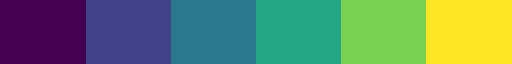

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [6]:
colores = ('#414487')
vcmap = plt.get_cmap ('viridis', 6)
display(vcmap)
coloresviridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range (6)]
plt.style.use ('ggplot')
display(coloresviridis)

Criando listas por tipo de variável, para facilitar codificação posteriormente

In [7]:
lista_varNumericas = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP' ]

lista_varOrdinais = ["Mother's qualification", "Father's qualification", 'Application order', 'Previous qualification']

lista_varCategoricas = ['Marital status', 'Course', 'Daytime/evening attendance', 'Nacionality',
       "Mother's occupation", "Father's occupation",'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

Função para tratamento de variáveis numéricas, feita para agilizar a comparação dos modelos com/sem normalização e/ou padronização

In [18]:
def TratamentoNum (x, normalizar=False, padronizar=False):
    Normalizador = MinMaxScaler()
    Padronizador = StandardScaler()

    if normalizar:
        #Normalização e padronização das variáveis de treino
        normalizado_treino = pd.DataFrame(Normalizador.fit_transform(x[lista_varNumericas]))
        #Removendo as colunas não normalizadas e não codificadas
        x_treinoCod = x.drop(lista_varNumericas, axis=1)

    if padronizar:
        x_treinoCod = pd.concat([x_treino, normalizado_treino])
        padronizado_treino = pd.DataFrame(Normalizador.fit_transform(normalizado_treino))

    return x

Função para tratamento das variáveis ordinais do dataset

In [ ]:
def OrdinalCod (x, tipo='bruto'):
    if tipo == 'bruto':
        x["Mother's qualification"] = x["Mother's qualification"].replace([
            'Analfabeto(a)','Ens. Fundamental incompleto','Ens. Fundamental completo','Ens. Médio completo',
            'Curso técnico/profissional', 'Ens. Superior completo', 'Ens. Fundamental completo'], [1, 2, 3, 4, 5, 6, 7])
        x["Father's qualification"] = x["Father's qualification"].replace([
            'Analfabeto(a)','Ens. Fundamental incompleto','Ens. Fundamental completo','Ens. Médio completo',
            'Curso técnico/profissional', 'Ens. Superior completo', 'Ens. Fundamental completo'], [1, 2, 3, 4, 5, 6, 7])
        x['Previous qualification'] = x['Previous qualification'].replace([
            'Ens. Fundamental completo', 'Ens. Médio completo', 'Ens. Superior completo'], [1, 2, 3])
        x['Application order'] = x['Application order'].replace(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], [1, 2, 3, 4, 5, 6, 7, 8, 9])
    elif tipo == 'OrdinalEncoding':
        pd.DataFrame(OrdinalEncoder().fit_transform(x[lista_varOrdinais]))

    return x

## 2.4 Compreendendo preliminarmente o dataset

Foram separadas aqui as visualizações relevantes para compreender decisões futuras referente a preprocessamento ou interpretação de dados no dataset

Proporção de features


([<matplotlib.patches.Wedge at 0x7bf64d875e10>,
 [Text(0.6125281606291753, 0.9732981313226896, 'Abandono'),
  Text(-0.9746008699627094, 0.6104532285670463, 'Cursando'),
  Text(0.002450046532344635, -1.149997390115295, 'Graduado')],
 [Text(0.3462115690512729, 0.5501250307476071, '32.1%'),
  Text(-0.5508613612832705, 0.3450387813639826, '17.9%'),
  Text(0.0013848089095860976, -0.6499985248477752, '49.9%')])

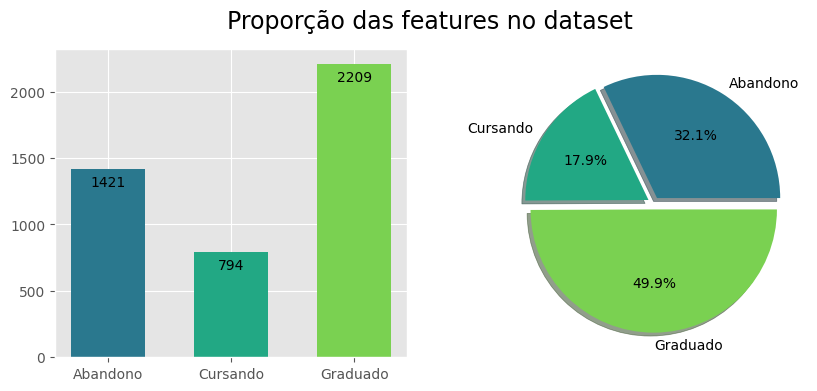

In [10]:
labels, counts = np.unique(df['Target'], return_counts=True)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

fig.suptitle('Proporção das features no dataset', fontsize=17)

axs[0].bar(labels, counts, width=0.6,  color=coloresviridis[2:5])
axs[0].bar_label(axs[0].containers[0], padding = -15)
axs[1].pie(counts, labels=labels, autopct='%1.1f%%', colors = coloresviridis[2:5], explode=(0.05, 0.05, 0.05), shadow=True)

Visualização das distribuições das variáveis numéricas
    
Vemos que nenhuma variável aparenta ter distribuição normal por conta de:
 - Distribuição leptocúrtica, já que tem curtose muito alta, no caso dados muito distribuídos (Pevious qualification (grade) & Admission Grade)
 - Assimetria a direita/positiva (Age at enrollment)
 - Distribuição praticamente multimodal (Unemployment rate, Inflation rate e GDP)


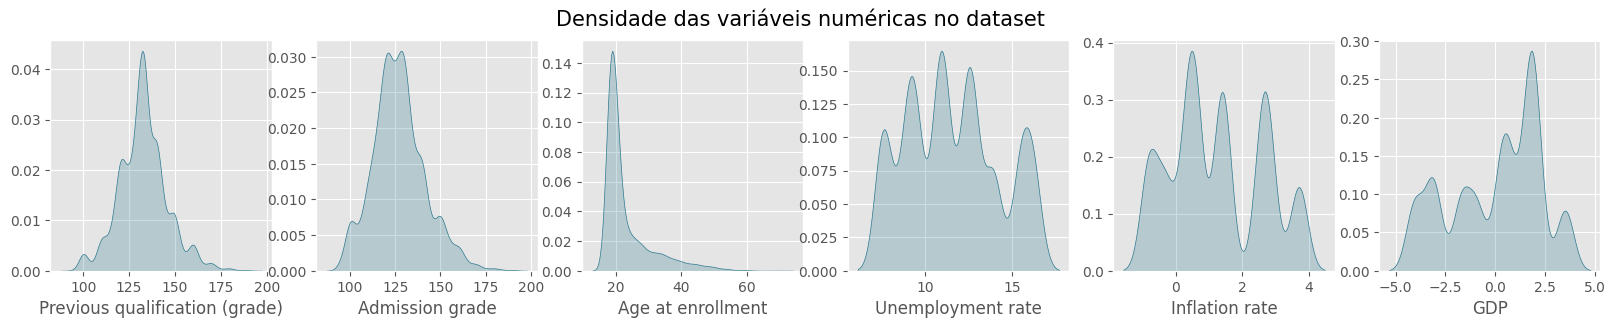

In [11]:
fig, axs = plt.subplots (ncols=len(lista_varNumericas), nrows=1, figsize=(20,3))
fig.suptitle('Densidade das variáveis numéricas no dataset', fontsize=15)
for i, j in enumerate(lista_varNumericas):
    sns.kdeplot(df[j], ax=axs[i], fill=True, color='#2a788e')
    axs[i].set_ylabel('')

**Visualização de variáveis ordinais**

As variáveis qualificação da mãe e do pai podem ser tratadas como ordinais se nos desfizermos dos 'desconhecidos' (n = 142)

[Text(0, 0, '3027'),
 Text(0, 0, '547'),
 Text(0, 0, '309'),
 Text(0, 0, '249'),
 Text(0, 0, '154'),
 Text(0, 0, '137'),
 Text(0, 0, '1')]

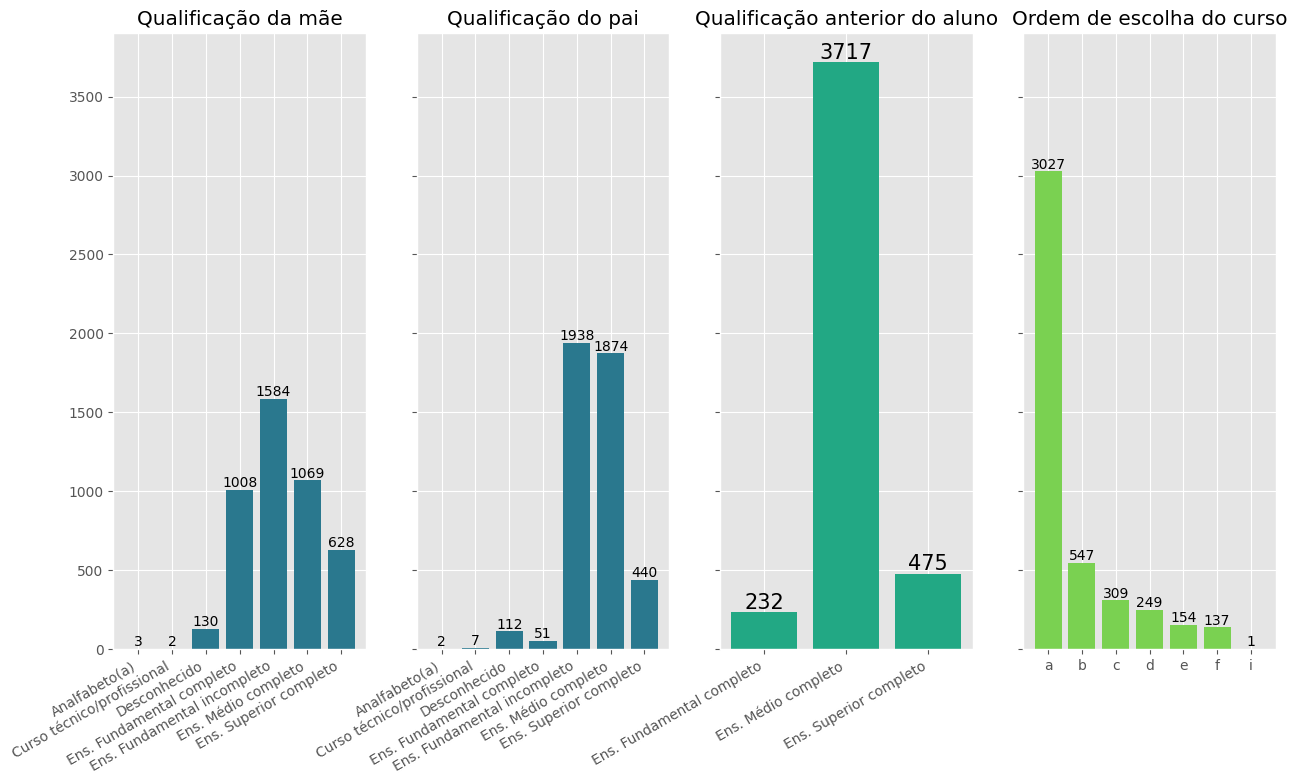

In [12]:
labelsM, countsM = np.unique(df["Mother's qualification"], return_counts=True)
labelsF, countsF = np.unique(df["Father's qualification"], return_counts=True)
labelsA, countsA = np.unique(df["Application order"], return_counts=True)
labelsP, countsP = np.unique(df['Previous qualification'], return_counts=True)

fig, axs = plt.subplots (ncols=4, nrows=1, sharey=True, figsize=(15,8))

axs[0].bar(labelsM, countsM, color="#2a788e")
axs[0].set_xticklabels(labelsM, rotation=30, ha='right')
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Qualificação da mãe')

axs[1].bar(labelsF, countsF, color="#2a788e")
axs[1].set_xticklabels(labelsF, rotation=30, ha='right')
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title("Qualificação do pai")

axs[2].bar(labelsP, countsP, color='#22a884')
axs[2].set_xticklabels(labelsP, rotation=30, ha='right')
axs[2].set_title("Qualificação anterior do aluno")
axs[2].bar_label(axs[2].containers[0], fontsize=15)

axs[3].bar(labelsA, countsA, color='#7ad151')
axs[3].set_title("Ordem de escolha do curso")
axs[3].bar_label(axs[3].containers[0], fontsize=10)

## 2.5 Tratando os dados

Remoção das linhas com valor 'desconhecido' nos atributos de qualificação dos pais

In [13]:
df = df.drop(df[df["Mother's qualification"] == 'Desconhecido'].index)
df = df.drop(df[df["Father's qualification"] == 'Desconhecido'].index)

Separação de variáveis entre inputs e output

In [14]:
x = df.drop('Target', axis=1)
y = df[['Target']]
x.shape, y.shape

((4282, 23), (4282, 1))

### 2.5.1 Variáveis categóricas

A codificação das variáveis *categóricas* foi feita antes da separação treino/teste. Se for feita **após** a separação, **o número de atributos entre os conjuntos treino/teste será desigual**, impedindo o treinamento dos modelos.

Função

In [15]:
#transformar variaveis categoricas nominais em dummies
xCatCod = pd.get_dummies(x[lista_varCategoricas], sparse=False, drop_first=True)
#dataset com variaveis cat em formma de dummies
xCatCodDF = pd.DataFrame(xCatCod)
#excluir as variaveis categoricas do dataframe X
xSemCat = x.drop(lista_varCategoricas, axis=1)
#usar o concat pra trazer novamente as variaveis categoricas, porém agora codificadas
X = pd.concat([xSemCat, xCatCodDF], axis=1)

**Escolha**

In [16]:
X

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,...,Father's occupation_Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes,Father's occupation_trabalhadores de serviços pessoais,Father's occupation_vendedores,Displaced_Sim,Educational special needs_Sim,Debtor_Sim,Tuition fees up to date_Sim,Gender_Masculino,Scholarship holder_Sim,International_Português
0,e,Ens. Médio completo,122.0,Ens. Fundamental completo,Ens. Fundamental completo,127.3,20,10.8,1.4,1.74,...,False,False,False,True,False,False,True,True,False,True
1,a,Ens. Médio completo,160.0,Ens. Médio completo,Ens. Superior completo,142.5,19,13.9,-0.3,0.79,...,False,False,False,True,False,False,False,True,False,True
2,e,Ens. Médio completo,122.0,Ens. Fundamental incompleto,Ens. Fundamental incompleto,124.8,19,10.8,1.4,1.74,...,False,False,False,True,False,False,False,True,False,True
3,b,Ens. Médio completo,122.0,Ens. Fundamental incompleto,Ens. Fundamental incompleto,119.6,20,9.4,-0.8,-3.12,...,False,False,False,True,False,False,True,False,False,True
4,a,Ens. Médio completo,100.0,Ens. Fundamental incompleto,Ens. Fundamental incompleto,141.5,45,13.9,-0.3,0.79,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,f,Ens. Médio completo,125.0,Ens. Médio completo,Ens. Médio completo,122.2,19,15.5,2.8,-4.06,...,False,False,False,False,False,False,True,True,False,True
4420,b,Ens. Médio completo,120.0,Ens. Médio completo,Ens. Médio completo,119.0,18,11.1,0.6,2.02,...,False,False,False,True,False,True,False,False,False,False
4421,a,Ens. Médio completo,154.0,Ens. Fundamental incompleto,Ens. Fundamental incompleto,149.5,30,13.9,-0.3,0.79,...,False,False,False,True,False,False,True,False,True,True
4422,a,Ens. Médio completo,180.0,Ens. Fundamental incompleto,Ens. Fundamental incompleto,153.8,20,9.4,-0.8,-3.12,...,False,False,False,True,False,False,True,False,True,True


### 2.5.2 Separação treino \ teste

In [17]:
Tamanho_teste = 0.3
seed = 12

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=Tamanho_teste, shuffle=True, random_state=seed, stratify=y)

print("Conjunto|Linhas|Atributos",
      "\nX Treino| %s | %s" % x_treino.shape,
      "\nX Teste | %s | %s" % x_teste.shape,
      "\nY Treino| %s | %s" % y_treino.shape,
      "\nY Teste | %s | %s" % y_teste.shape)

Conjunto|Linhas|Atributos 
X Treino| 2997 | 135 
X Teste | 1285 | 135 
Y Treino| 2997 | 1 
Y Teste | 1285 | 1


Codificar o restante das variaveis de treino e testi

### 2.5.3 Variáveis numéricas

***Decisão***

In [20]:
x_treino, x_teste = TratamentoNum (x_treino, normalizar=True, padronizar=True), TratamentoNum (x_teste, normalizar=True, padronizar=True)
x_treino.shape, x_teste.shape

((2997, 135), (1285, 135))

### 2.5.4 Variáveis ordinais

**Mother's qualification/Father's qualification**

1. 'Analfabeto(a)'
2. 'Ens. Fundamental incompleto'
3. 'Ens. Fundamental completo'
4. 'Ens. Médio completo',
5. 'Curso técnico/profissional'
6. 'Ens. Superior completo'
7. 'Ens. Fundamental completo'

**Previous qualification**

1. 'Ens. Fundamental completo'
2. 'Ens. Médio completo'
3. 'Ens. Superior completo'

**Application order**

'a' a 'i' =  1 a 9

**Decisão**

In [22]:
x_treino, x_teste = OrdinalCod(x_treino), OrdinalCod(x_teste)
x_treino.shape, x_teste.shape,
x_treino

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,...,Father's occupation_Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes,Father's occupation_trabalhadores de serviços pessoais,Father's occupation_vendedores,Displaced_Sim,Educational special needs_Sim,Debtor_Sim,Tuition fees up to date_Sim,Gender_Masculino,Scholarship holder_Sim,International_Português
997,1,3,130.0,3,4,130.0,22,12.4,0.5,1.79,...,False,False,False,True,False,False,True,False,False,False
2391,1,2,130.0,2,4,130.0,25,15.5,2.8,-4.06,...,False,False,False,False,False,False,True,True,False,True
2031,1,2,140.0,2,2,112.0,45,12.7,3.7,-1.70,...,False,False,False,False,False,True,True,False,False,True
1621,1,2,126.0,2,2,123.6,21,10.8,1.4,1.74,...,False,False,False,True,False,False,True,False,False,True
203,1,3,130.0,2,2,126.7,21,13.9,-0.3,0.79,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3,2,118.0,2,2,121.2,18,7.6,2.6,0.32,...,False,False,False,True,False,False,True,False,False,True
4054,2,2,135.0,2,2,126.3,20,8.9,1.4,3.51,...,False,False,False,True,True,False,True,False,True,True
3725,1,3,130.0,4,4,130.0,22,15.5,2.8,-4.06,...,False,False,False,False,False,False,True,True,False,True
137,1,2,153.0,4,4,157.9,18,8.9,1.4,3.51,...,False,False,False,False,False,True,True,False,True,True


### 2.5.5 Feature

Conj. codificado com Y maiúsculo.

para codificação da variável target foi escolhido o Label Ecoder, por ter como output um array unidimensional que retem a diferença de variáveis. Assim os modelos podem interpretar o atributo sem problemas

In [23]:
vdEncoder = LabelEncoder()

Y_treino = vdEncoder.fit_transform(y_treino)
Y_teste = vdEncoder.fit_transform(y_teste)

print(type(Y_treino), len(Y_treino), '\n',type(Y_teste), len(Y_teste))

<class 'numpy.ndarray'> 2997 
 <class 'numpy.ndarray'> 1285


### 2.5.6 Visão geral

In [24]:
x_treino

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,...,Father's occupation_Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes,Father's occupation_trabalhadores de serviços pessoais,Father's occupation_vendedores,Displaced_Sim,Educational special needs_Sim,Debtor_Sim,Tuition fees up to date_Sim,Gender_Masculino,Scholarship holder_Sim,International_Português
997,1,3,130.0,3,4,130.0,22,12.4,0.5,1.79,...,False,False,False,True,False,False,True,False,False,False
2391,1,2,130.0,2,4,130.0,25,15.5,2.8,-4.06,...,False,False,False,False,False,False,True,True,False,True
2031,1,2,140.0,2,2,112.0,45,12.7,3.7,-1.70,...,False,False,False,False,False,True,True,False,False,True
1621,1,2,126.0,2,2,123.6,21,10.8,1.4,1.74,...,False,False,False,True,False,False,True,False,False,True
203,1,3,130.0,2,2,126.7,21,13.9,-0.3,0.79,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3,2,118.0,2,2,121.2,18,7.6,2.6,0.32,...,False,False,False,True,False,False,True,False,False,True
4054,2,2,135.0,2,2,126.3,20,8.9,1.4,3.51,...,False,False,False,True,True,False,True,False,True,True
3725,1,3,130.0,4,4,130.0,22,15.5,2.8,-4.06,...,False,False,False,False,False,False,True,True,False,True
137,1,2,153.0,4,4,157.9,18,8.9,1.4,3.51,...,False,False,False,False,False,True,True,False,True,True


In [25]:
x_teste

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,...,Father's occupation_Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes,Father's occupation_trabalhadores de serviços pessoais,Father's occupation_vendedores,Displaced_Sim,Educational special needs_Sim,Debtor_Sim,Tuition fees up to date_Sim,Gender_Masculino,Scholarship holder_Sim,International_Português
2878,1,2,133.1,2,2,100.0,34,12.7,3.7,-1.70,...,False,False,False,False,False,False,True,False,False,True
4274,1,2,131.0,2,4,134.5,25,7.6,2.6,0.32,...,False,False,False,True,False,False,True,True,False,True
3452,1,2,133.0,4,4,100.0,20,12.7,3.7,-1.70,...,False,False,False,False,False,False,True,False,False,True
1397,1,3,150.0,3,2,147.7,22,12.4,0.5,1.79,...,False,False,False,False,False,True,True,False,True,True
1491,1,2,133.1,4,6,116.0,20,16.2,0.3,-0.92,...,False,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1,2,120.0,2,4,123.2,27,10.8,1.4,1.74,...,False,False,False,False,False,False,True,False,False,True
1451,1,2,148.0,3,2,131.6,19,15.5,2.8,-4.06,...,False,False,False,True,False,False,True,True,False,True
10,1,2,139.0,2,4,130.6,18,13.9,-0.3,0.79,...,False,False,False,True,False,False,True,False,False,True
3329,1,2,110.0,4,4,99.0,21,10.8,1.4,1.74,...,False,False,False,False,False,False,True,True,False,True


In [27]:
Y_treino, Y_teste

(array([1, 0, 0, ..., 0, 2, 0]), array([0, 1, 2, ..., 2, 1, 2]))

# 3. Seleção dos modelos

## 3.1 Treinamento inicial

**Treinamento dos modelos para avaliação comparativa dos resultados.**

A escolha de métrica para avaliar os resultados foi o Escore F1 Weighted, por se tratar de um 'equilibrio' entre precisão e recall e por dar peso a variáveis menos presentes no dataset. Que é importante já que temos um desbalanceamento de classes na distribuição da variável target.

LR: média =  0.572032±0.029
KNN: média =  0.488363±0.033
CART: média =  0.529093±0.039
NB: média =  0.165445±0.016
SVM: média =  0.415760±0.018
Bagging: média =  0.605850±0.028
RF: média =  0.581021±0.023
Extra Trees: média =  0.593174±0.028
AdaBoost: média =  0.607141±0.021
Gradient Boosting: média =  0.608356±0.026
Voting: média =  0.555100±0.028


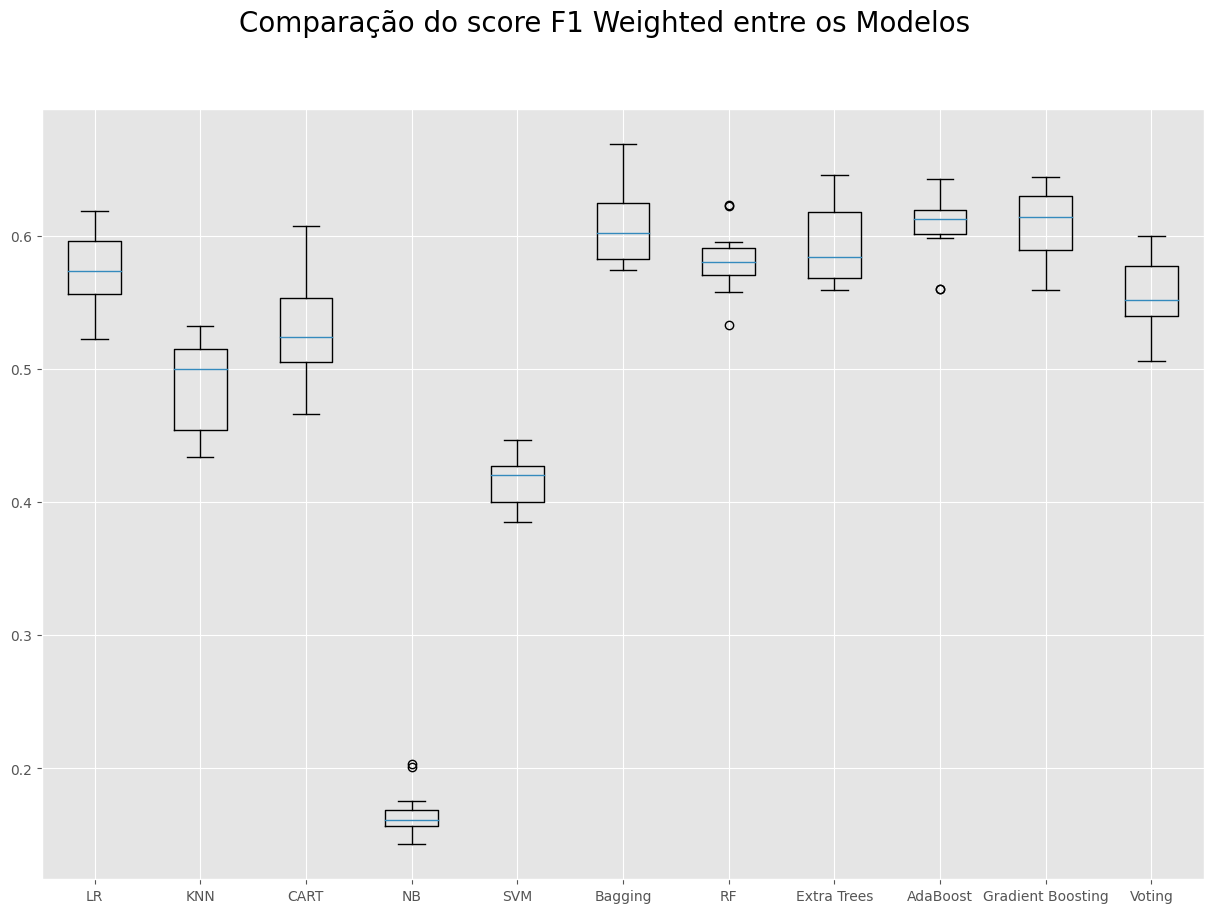

In [28]:
np.random.seed(12) # definindo uma semente global
SKFold = StratifiedKFold(n_splits=15)
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=250)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Extra Trees', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, x_treino, Y_treino, cv=SKFold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    msg = "%s: média =  %f±%.3f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação do score F1 Weighted entre os Modelos', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Como os modelos de ensamble apresentaram maior pontuação, foi selecionado aquele com maior média, nesse caso, o Gradient Boosting Classifier.

Avaliando o modelo base, 'Modelo' e 'Resultado' (com iniciais maiúsculas) serão usados como parâmetro para comparação posterior



Antes de partir para a otimização dos Hiperparâmetros do modelo, vamos testar se o número de splits na estratificação k-fold pode alterar o escore do modelo de forma relevante

In [31]:
SKFold = StratifiedKFold(n_splits=10)

Modelo = (GradientBoostingClassifier(n_estimators=100, random_state=12))
Resultado = cross_val_score(Modelo, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')

print(st.median(list(Resultado)))

SyntaxError: invalid decimal literal (<ipython-input-31-6a28f250a924>, line 6)

In [30]:
SKFold5 = StratifiedKFold(n_splits=5)
modeloSK5 = (GradientBoostingClassifier(n_estimators=100, random_state=12))
resultadoSK5 = cross_val_score(Modelo, x_treino, y_treino, cv=SKFold5, scoring='f1_weighted')

SKFold15 = StratifiedKFold(n_splits=15)
modeloSK15 = (GradientBoostingClassifier(n_estimators=100, random_state=12))
resultadoSK15 = cross_val_score(Modelo, x_treino, y_treino, cv=SKFold15, scoring='f1_weighted')

SKFold20 = StratifiedKFold(n_splits=20)
modeloSK20 = (GradientBoostingClassifier(n_estimators=100, random_state=12))
resultadoSK20 = cross_val_score(Modelo, x_treino, y_treino, cv=SKFold20, scoring='f1_weighted')

print('SKFold',
    '\n 5: %.3f' %st.median(list(resultadoSK5)),
    '\n 15: %.3f' %st.median(list(resultadoSK15)),
    '\n 20: %.3f' %st.median(list(resultadoSK20)))

SKFold 
 5: 0.589 
 15: 0.614 
 20: 0.602


Como o numero de Folds foi relativamente elevado, o numero de opções de hiperparâmetros escolhido foi de 3, já que o modelo em questão é bem custoso em termos de processamento

## 3.2 Otimização de Hiperparâmetros

In [33]:
SKFold = StratifiedKFold(n_splits=15)

Modelo = (GradientBoostingClassifier(n_estimators=100, random_state=12))
Resultado = cross_val_score(Modelo, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')

print('média: %.3f' %st.median(list(Resultado)))

média: 0.61


### 3.2.1 *Max Depth*
o padrão é 3

In [ ]:
SKFold = StratifiedKFold(n_splits=15)

modeloMD2 = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=2))
modeloMD5 = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=5))
modeloMD9 = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=9))

resultadoMD2 = cross_val_score(modeloMD2, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')
resultadoMD5 = cross_val_score(modeloMD5, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')
resultadoMD9 = cross_val_score(modeloMD9, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')

print ('Max_Depth',
    '\n 2: %.3f' %st.median(list(resultadoMD2)),
    '\n 5: %.3f' %st.median(list(resultadoMD5)),
    '\n 9: %.3f' %st.median(list(resultadoMD9)))

Max_Depth 
 2: 0.600 
 5: 0.621 
 9: 0.603


### 3.2.3 *Learning Rate*
 o padrão é 0.1

In [ ]:
SKFold = StratifiedKFold(n_splits=15)

modeloLR3 = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=5, learning_rate=0.3))
modeloLR5 = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=5, learning_rate=0.5))
modeloLR9 = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=5, learning_rate=0.9))

resultadoLR3 = cross_val_score(modeloLR3, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')
resultadoLR5 = cross_val_score(modeloLR5, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')
resultadoLR9 = cross_val_score(modeloLR9, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')


print ('Learning Rate',
    '\n 0.3: %.3f' %st.median(resultadoLR3),
    '\n 0.5: %.3f' %st.median(resultadoLR5),
    '\n 0.9: %.3f' %st.median(resultadoLR9))

Learning Rate 
 0.3: 0.600 
 0.5: 0.607 
 0.9: 0.595


### 3.2.4 *Critério*
Friedman MSE(padrão) x Mean Squared Error

In [ ]:
modeloF = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=7, learning_rate=0.1, criterion='friedman_mse'))
modeloMQ = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=7, learning_rate=0.1, criterion='squared_error'))

resultadoF = cross_val_score(modeloF, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')
resultadoMQ = cross_val_score(modeloMQ, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')

print ('Critério',
    '\n Friedman MSE:%.3f' %st.median(list(resultadoF)),
    '\n Mean quared error: %.3f' %st.median(list(resultadoMQ)))

Critério 
 Friedman MSE:0.605 
 Mean quared error: 0.610


### 3.2.2 Modelo final, com as melhores opções e hiperparâmtros alterados
- Max Depth: 5
- Learning Rate: 0.1 (Padrão)
- Critério: Mean Squared Error

In [34]:
SKFold = StratifiedKFold(n_splits=15)

modeloh = (GradientBoostingClassifier(n_estimators=150, random_state=12, max_depth=5, learning_rate=0.1, criterion='squared_error'))

resultadoh = cross_val_score(modeloh, x_treino, y_treino, cv=SKFold, scoring='f1_weighted')

print('média: %.3f' %st.median(list(resultadoh)))

média: 0.621


Visualização da comparação entre os folds da validação cruzada entre o modelo sem e com otimização

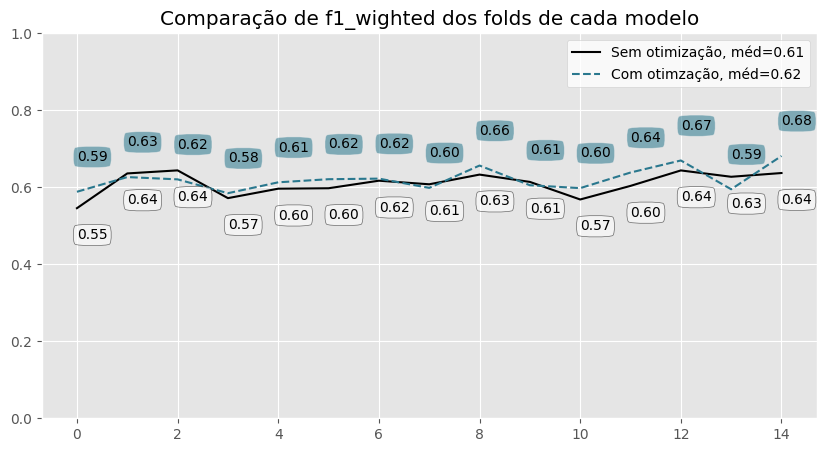

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(Resultado, linestyle='-', color='#000000', label='Sem otimização, méd=0.61')
for i, txt in enumerate(Resultado):
  plt.annotate(text='%.2f' %txt, xy=(i, txt-0.08)).set_bbox(dict(facecolor='w', edgecolor='#000000', alpha=0.55, boxstyle='round4'))

plt.plot(resultadoh, linestyle='--', color='#2a788e', label='Com otimzação, méd=0.62')
for i, txt in enumerate(resultadoh):
  plt.annotate(text='%.2f' %txt, xy=(i, txt+0.08)).set_bbox(dict(facecolor='#2a788e', alpha=0.55, boxstyle='round4'))

plt.title('Comparação de f1_wighted dos folds de cada modelo')
plt.ylim(bottom=0, top=1)
plt.legend(facecolor='w')

## 4.2 Seleção de Características

### 4.2.1 Aplicação das técnicas de feature selection

In [37]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(x_treino, y_treino.values.ravel())

# Reduz X para os atributos selecionados
features = fit.transform(x_treino)

# Resultados
print('\nNúmero original de atributos:', x_treino.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", x_treino.columns[0:23])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=x_treino.columns[0:135]))

x_selec = best_var.get_feature_names_out(input_features=x_treino.columns[0:135])


Número original de atributos: 135

Número reduzido de atributos: 10

Atributos Originais: Index(['Application order', 'Previous qualification',
       'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Admission grade', 'Age at enrollment',
       'Unemployment rate', 'Inflation rate', 'GDP',
       'Marital status_Divorciado(a)', 'Marital status_Separado legalmente',
       'Marital status_Solteiro(a)', 'Marital status_União de fato',
       'Marital status_Viuvo(a)', 'Course_Administração (Vespertino)',
       'Course_Agronomia', 'Course_Animação e design de multimídia',
       'Course_Design da Comunicação', 'Course_Educação Básica',
       'Course_Enfermagem', 'Course_Enfermagem Veterinária',
       'Course_Engenharia Informática'],
      dtype='object')

Scores dos Atributos Originais: [1.945e+01 1.417e+00 1.946e+01 6.546e+00 5.929e+00 1.948e+01 9.232e+01
 1.001e+01 9.382e-01 3.146e+00 5.452e+00 2.718e-01 1.424e+01 6.034e-02
 4.421e+00 2

In [38]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modeloFS = ExtraTreesClassifier(n_estimators=100)
modeloFS.fit(x_treino,y_treino.values.flatten())

# Exibe os atributos orginais
print("\nAtributos Originais: %s" % x.columns[0:135])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print('pontuações: %s' % list(modeloFS.feature_importances_))


Atributos Originais: Index(['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')
pontuações: [0.029775512398739115, 0.017973172367982203, 0.05674779609972032, 0.03608980491618549, 0.030472431237086248, 0.05877163871182062, 0.0592834169347801, 0.042515167547055324, 0.04071635187916896, 0.04334772100363313, 0.0030980747749479796, 0.000391119769015319, 0.009549060424606072, 0.0010094980754800293, 0.000563597584423197, 0.006199671843759994, 0.006060656258459254, 0.008361648563127298, 0.00822433411537876, 0

### 4.2.2 Teste do modelo com as variáveis selecionadas

In [39]:
SKFold = StratifiedKFold(n_splits=15)

modeloFS = GradientBoostingClassifier(n_estimators=100)

resultadoFS = cross_val_score(modeloh, x_treino[best_var.get_feature_names_out(input_features=x_treino.columns[0:135])], y_treino.values.flatten(), cv=SKFold, scoring='accuracy')

diferença de acurácias: -0.0056


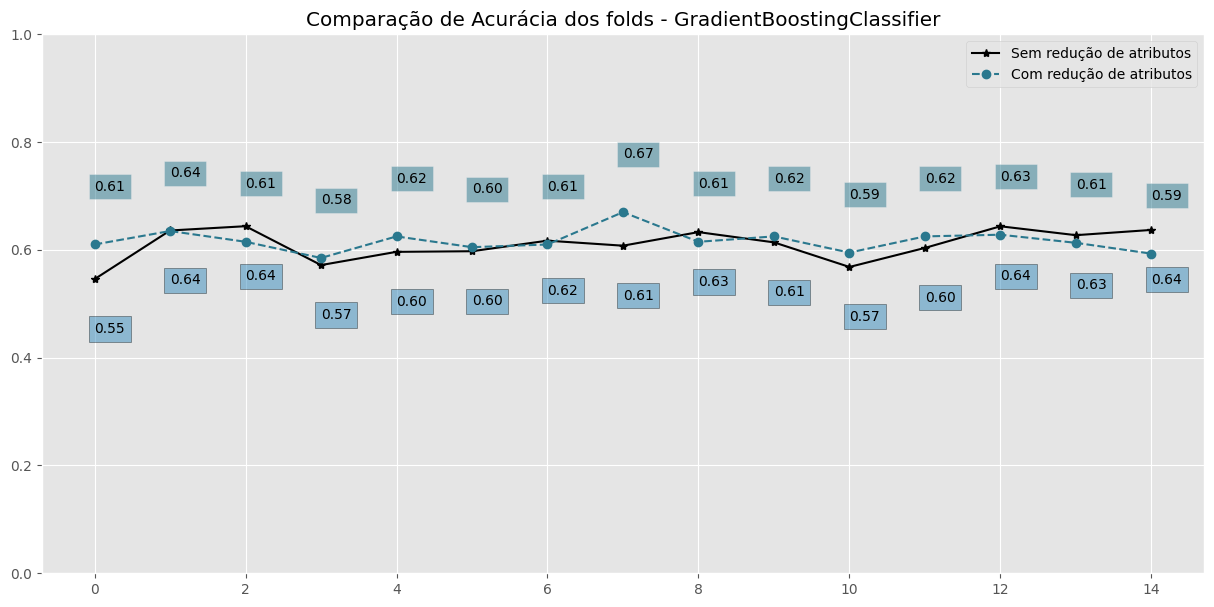

In [40]:

plt.figure(figsize=(15, 7))

plt.plot(Resultado, linestyle='-', marker="*", color='#000000', label='Sem redução de atributos')
plt.plot(resultadoFS, linestyle='--', marker="o", color='#2a788e', label='Com redução de atributos')

plt.ylim(bottom=0, top=1)
plt.legend()
for i, txt in enumerate(Resultado):
  plt.annotate(text='%.2f' %txt, xy=(i, txt-0.1)).set_bbox(dict(edgecolor='#000000', alpha=0.5))
for i, txt in enumerate(resultadoFS):
  plt.annotate(text='%.2f' %txt, xy=(i, txt+0.1)).set_bbox(dict(facecolor='#2a788e', alpha=0.5))

plt.title("Comparação de Acurácia dos folds - GradientBoostingClassifier")

dif = st.median(list(resultadoFS)) - st.median(list(resultadoh))
dif
print('diferença de acurácias: %.4f' %dif)

A Seleção de Características acima aparenta não ser 'relevante' para a pontuação do modelo, já que alguns atributos selecionados são na verdade variáveis de atributos em vez a atributos de fato. Apesar disso, os atributos apontados((e.g., Ser bolsista, gênero masculino, idade, cursos específicos) se mostraram mais relevantes para a capacidade preditiva do modelo.

# 4. Analise dos resultados

## 4.1 Matriz de confusão

Comparação entre modelo otimizado e não otimizado

In [ ]:
fit = Modelo.fit(x_treino, Y_treino)
Predicao = fit.predict (x_teste)
Matriz_confusion = metrics.confusion_matrix(Y_teste, Predicao)
print(Matriz_confusion)

[[203  22 171]
 [ 54  26 157]
 [ 56  12 584]]


In [ ]:
fit = modeloh.fit(x_treino, Y_treino)
predicaoh = fit.predict (x_teste)
matriz_confusion = metrics.confusion_matrix(Y_teste, predicao)
print(matriz_confusion)

[[216  44 136]
 [ 56  51 130]
 [ 69  36 547]]


[Text(0, -20, '396'), Text(0, -20, '237'), Text(0, -20, '652')]

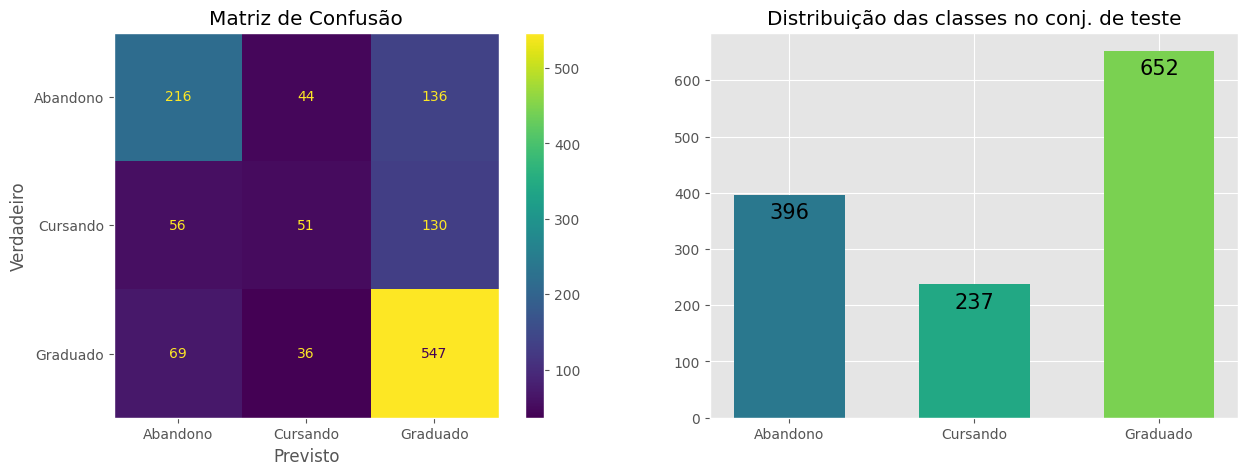

In [ ]:
#Visualização do modelo otimizado

labels, counts = np.unique(y_teste, return_counts=True)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

metrics.ConfusionMatrixDisplay(matriz_confusion).plot(ax=axs[0])
axs[0].set_title('Matriz de Confusão')
axs[0].set_xlabel('Previsto')
axs[0].set_ylabel('Verdadeiro')
axs[0].set_xticks([0, 1, 2], ['Abandono', 'Cursando', 'Graduado'])
axs[0].set_yticks([0, 1, 2], ['Abandono', 'Cursando', 'Graduado'])
axs[0].grid(False)


axs[1].set_title('Distribuição das classes no conj. de teste')
axs[1].bar(labels, counts, width=0.6,  color=coloresviridis[2:5])
axs[1].bar_label(axs[1].containers[0], padding = -20, fontsize=15)

Comparação final das métricas por classe

In [ ]:
print(sklearn.metrics.classification_report(Y_teste, Predicao, target_names=['Abandono', 'Cursando', 'Graduado']))

              precision    recall  f1-score   support

    Abandono       0.65      0.51      0.57       396
    Cursando       0.43      0.11      0.18       237
    Graduado       0.64      0.90      0.75       652

    accuracy                           0.63      1285
   macro avg       0.57      0.51      0.50      1285
weighted avg       0.60      0.63      0.59      1285



In [ ]:
print(sklearn.metrics.classification_report(Y_teste, predicaoh, target_names=['Abandono', 'Cursando', 'Graduado']))

              precision    recall  f1-score   support

    Abandono       0.63      0.55      0.59       396
    Cursando       0.39      0.22      0.28       237
    Graduado       0.67      0.84      0.75       652

    accuracy                           0.63      1285
   macro avg       0.57      0.53      0.54      1285
weighted avg       0.61      0.63      0.61      1285



## 4.2 Conclusão

### 4.2.1 **Opções de melhoras futuras para o projeto**

- Otimização de hiperparâmetros também da Regressão Logística, por ser menos custosa em termos de processamento, assim seria possível avaliar a se este modelo poderia apresentar resultados semelhantes e com menor custo de processamento e em menor tempo.
- Uso de algorítmos de oversampling (e.g., SMOTE, da biblioteca imblearn) para avaliar se um equilibrio de classes artifical no conjunto de treino poderia trazer melhor pontuação geral e melhor f1 na classe 'cursando' do conjunto de teste, que é a com pior escore.
- Feature selection de variáveis categóricas, por meio de testes estatísticos apropriados, como Análises de Variancia e qui quadrado



### 4.2.2 Cometários gerais para o Checklist de Avaliação de Resultados


Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

 - *Selecione as métricas de avaliação condizentes com o problema, justificando.*
     - Foi escolhido como métrica o score F1, pois como temos um dataset desbalanceado, o erro da classe em menor proporção pesa mais que em outra classe
     - Além disso, como o a variável dependente possui 3 classes, então avaliar as métricas do modelo para cada uma é de suma importância, já que
 - *Os resultados fazem sentido?*
    - Sim, tendo em vista o desbalanceamento e o tamanho da dimensionalidade dos dados, espera-se que o modelo não tenha tanta capacidade preditiva (acertando um pouco mais do que 60% no geral, e tendo precisão, recall e score f1 sub-ótimos para a classe 'cursando' que é a de menor proporção).
 - *Foi observado algum problema de overfitting?*
    - Não, além das métricas de validação cruzada não apresentarem valores muito altos (todos os modelos apresentaram resultados <70), estas métricas condizem com as os resultados do modelo avaliado com o conjunto de teste.
 - *Compare os resultados de diferentes modelos.*
    - No momento inicial de seleção de modelo, foram usados tanto algorítmos individuais quanto ensembles, todos comparados entre si com a métrica de f1 na etapa 3 (i.e., Seleção dos Modelos)
 - *Descreva a melhor solução encontrada, justificando.*
    - A melhor solução encontrada foi apenas a seleção do melhor modelo mantendo as características originais, com normalização e padronização. A falta de expertise do autor foi um fator limitante, já que primeiro contato com os conteúdos (e.g., Machine Learning, Python, Dados) ocorreu durante as sprints da especialização, e seu background seja em saúde (Psicologia) fazendo com que o tempo para realização das atividades triviais leve possívelmente um tempo acima do esperado.